# Лінійна регресія: перенавчання та регуляризація

У цьому завданні ми на прикладах побачимо, як перенавчаються лінійні моделі, розберемо, чому так відбувається, і з'ясуємо, як діагностувати та контролювати перенавчання.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

Ми будемо працювати з датасетом "bikes_rent.csv", в якому щодня записані календарна інформація та погодні умови, що характеризують автоматизовані пункти прокату велосипедів, а також кількість прокатів цього дня. Останнє ми передбачатимемо; таким чином, ми вирішуватимемо завдання регресії.

Завантажте датасет за допомогою функції pandas.read_csv у змінну df. Виведіть перші 5 рядків, щоб переконатися у коректному зчитуванні даних:

In [2]:
#Додайте код
data = pd.read_csv('bikes_rent.csv', delimiter=',', encoding='latin1')  
data.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


Для кожного дня прокату відомі такі ознаки:

* _season_: 1 - весна, 2 - літо, 3 - осінь, 4 - зима
* _yr_: 0 - 2011, 1 - 2012
* _mnth_: від 1 до 12
* _holiday_: 0 – немає свята, 1 – є свято
* _weekday_: від 0 до 6
* _workingday_: 0 - неробочий день, 1 - робочий день
* _weathersit_: оцінка сприятливості погоди від 1 (чистий, ясний день) до 4 (злива, туман)
* _temp_: температура у Цельсіях
* _atemp_: температура по відчуттям у Цельсіях
* _hum_: вологість
* _windspeed(mph)_: швидкість вітру в милях на годину
* _windspeed(ms)_: швидкість вітру в метрах за секунду
* _cnt_: кількість орендованих велосипедів (це цільова ознака, його ми передбачатимемо)

Отже, у нас є дійсні, бінарні та номінальні (порядкові) ознаки, і з усіма з них можна працювати як із речовими. З номінальними ознаками теж можна працювати як із дійсними, тому що на них заданий порядок. Давайте подивимося на графіках, як цільова ознака залежить від інших

Побудуйте графіки залежностей атрибутів від кількості подорожей. Тобто вам потрібно побудувати 12 графіків. На кожному має бути зображена залежність чергового атрибуту від змінної **cnt**.

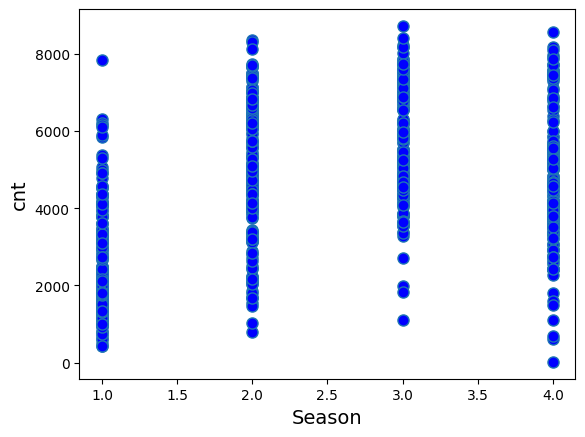

In [3]:
# Додайте код

plt.plot(
    data["season"],
    data["cnt"],
    marker="o",
    linestyle="",
    markersize=8,
    markerfacecolor="b",
)
plt.ylabel("cnt", fontsize=14)
plt.xlabel("Season", fontsize=14)
plt.show()

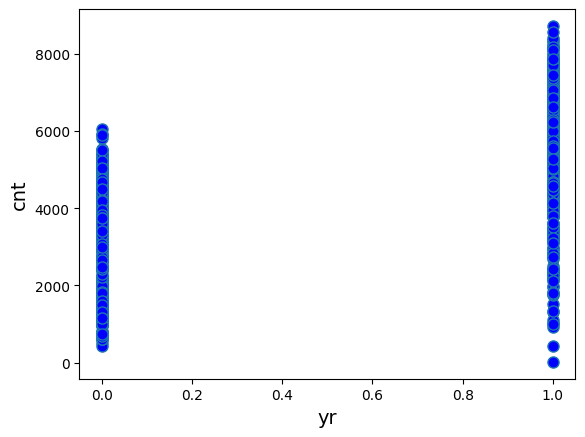

In [4]:
plt.plot(
    data["yr"],
    data["cnt"],
    marker="o",
    linestyle="",
    markersize=8,
    markerfacecolor="b",
)
plt.ylabel("cnt", fontsize=14)
plt.xlabel("yr", fontsize=14)
plt.show()

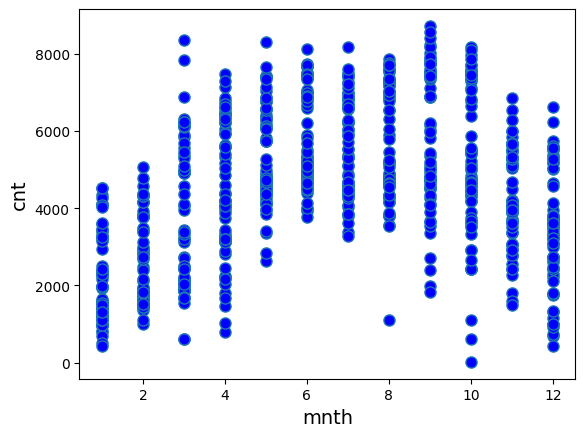

In [5]:
plt.plot(
    data["mnth"],
    data["cnt"],
    marker="o",
    linestyle="",
    markersize=8,
    markerfacecolor="b",
)
plt.ylabel("cnt", fontsize=14)
plt.xlabel("mnth", fontsize=14)
plt.show()

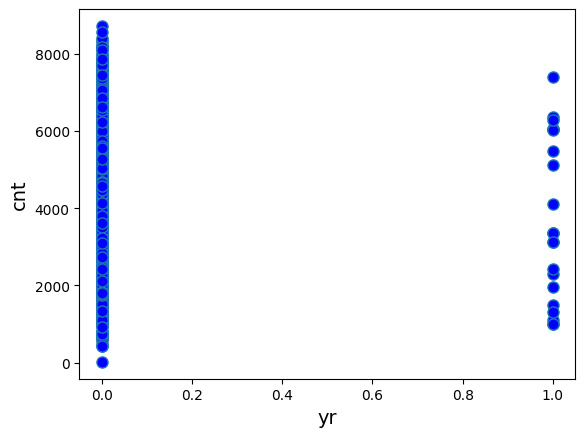

In [6]:
plt.plot(
    data["holiday"],
    data["cnt"],
    marker="o",
    linestyle="",
    markersize=8,
    markerfacecolor="b",
)
plt.ylabel("cnt", fontsize=14)
plt.xlabel("yr", fontsize=14)
plt.show()

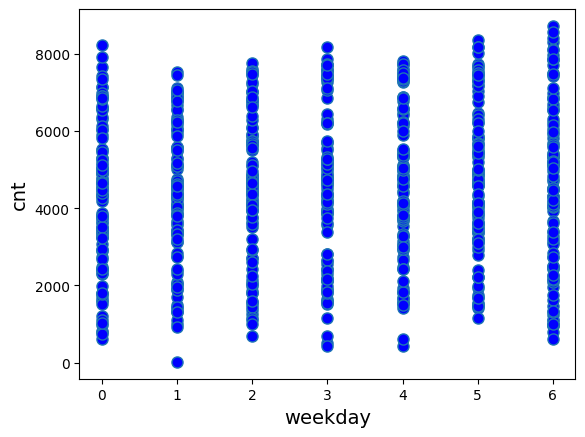

In [7]:
plt.plot(
    data["weekday"],
    data["cnt"],
    marker="o",
    linestyle="",
    markersize=8,
    markerfacecolor="b",
)
plt.ylabel("cnt", fontsize=14)
plt.xlabel("weekday", fontsize=14)
plt.show()

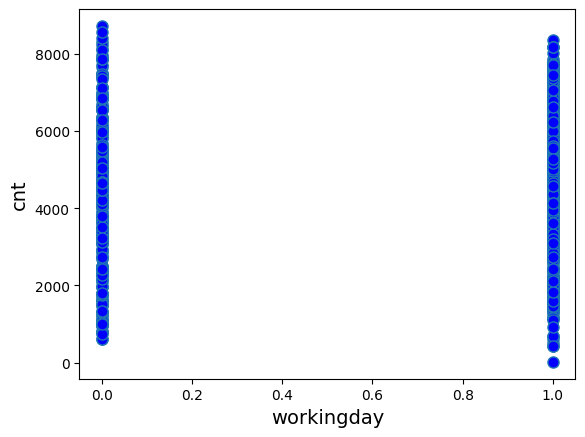

In [8]:
plt.plot(
    data["workingday"],
    data["cnt"],
    marker="o",
    linestyle="",
    markersize=8,
    markerfacecolor="b",
)
plt.ylabel("cnt", fontsize=14)
plt.xlabel("workingday", fontsize=14)
plt.show()

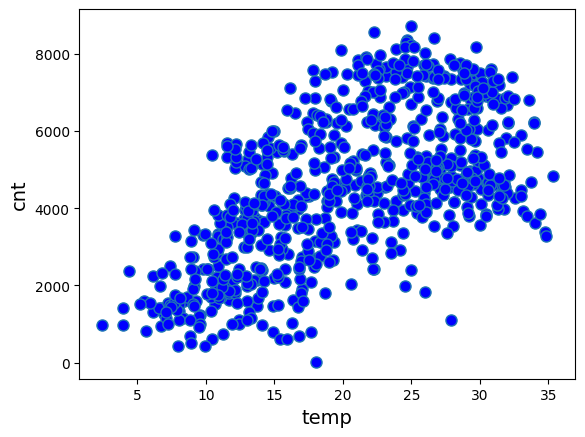

In [9]:
plt.plot(
    data["temp"],
    data["cnt"],
    marker="o",
    linestyle="",
    markersize=8,
    markerfacecolor="b",
)
plt.ylabel("cnt", fontsize=14)
plt.xlabel("temp", fontsize=14)
plt.show()

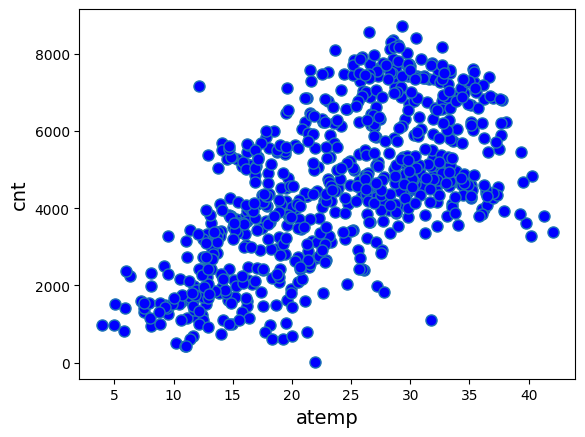

In [10]:
plt.plot(data['atemp'], data['cnt'], marker="o", linestyle="", markersize=8, markerfacecolor="b")
plt.ylabel("cnt", fontsize=14)
plt.xlabel("atemp", fontsize=14)
plt.show()

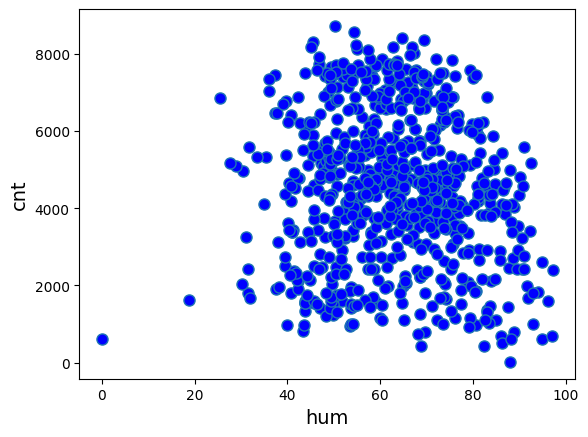

In [11]:
plt.plot(data['hum'], data['cnt'], marker="o", linestyle="", markersize=8, markerfacecolor="b")
plt.ylabel("cnt", fontsize=14)
plt.xlabel("hum", fontsize=14)
plt.show()

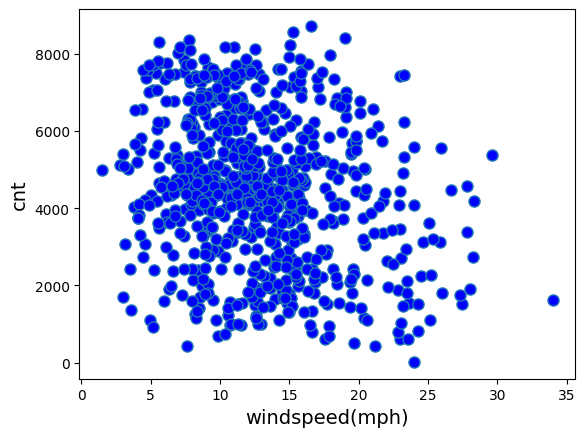

In [12]:
plt.plot(
    data["windspeed(mph)"],
    data["cnt"],
    marker="o",
    linestyle="",
    markersize=8,
    markerfacecolor="b",
)
plt.ylabel("cnt", fontsize=14)
plt.xlabel("windspeed(mph)", fontsize=14)
plt.show()

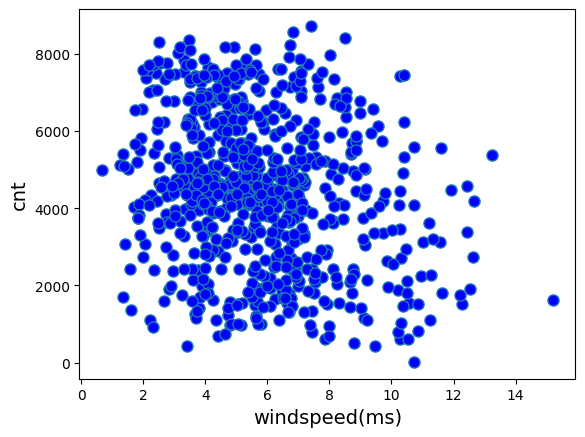

In [13]:
plt.plot(
    data["windspeed(ms)"],
    data["cnt"],
    marker="o",
    linestyle="",
    markersize=8,
    markerfacecolor="b",
)
plt.ylabel("cnt", fontsize=14)
plt.xlabel("windspeed(ms)", fontsize=14)
plt.show()

1. Який характер залежності кількості прокатів від місяця?
1. В літні місяці число прокатів в середньому зростають, в зимові зменшуються
2. Вкажіть одну чи дві ознаки, від яких кількість прокатів швидше за все залежить лінійно
2. temp (температура в Цельсіях), atemp (температура по відчуттям у Цельсіях)



Давайте суворо оцінимо рівень лінійної залежності між ознаками та цільовою змінною. Гарною мірою лінійної залежності між двома векторами є кореляція Пірсона. Для її обчислення в pandas можна використовувати методи датафрейму: corr та corrwith.

Порахуйте кореляції всіх ознак, крім останньої, з останнім за допомогою методу `corrwith`.

In [14]:
#Додайте код
data.corrwith(data['cnt'])

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
cnt               1.000000
dtype: float64

У вибірці є ознаки, що корелюють із цільовим, а отже, завдання можна вирішувати лінійними методами.

По графікам видно, деякі ознаки схожі один на одного. Тому давайте також порахуємо кореляції між дійсними ознаками.

Порахуйте попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) та cnt
за допомогою методу corr:

In [15]:
#Додайте код
data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.006292,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.014282,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.018796,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,0.039511,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659


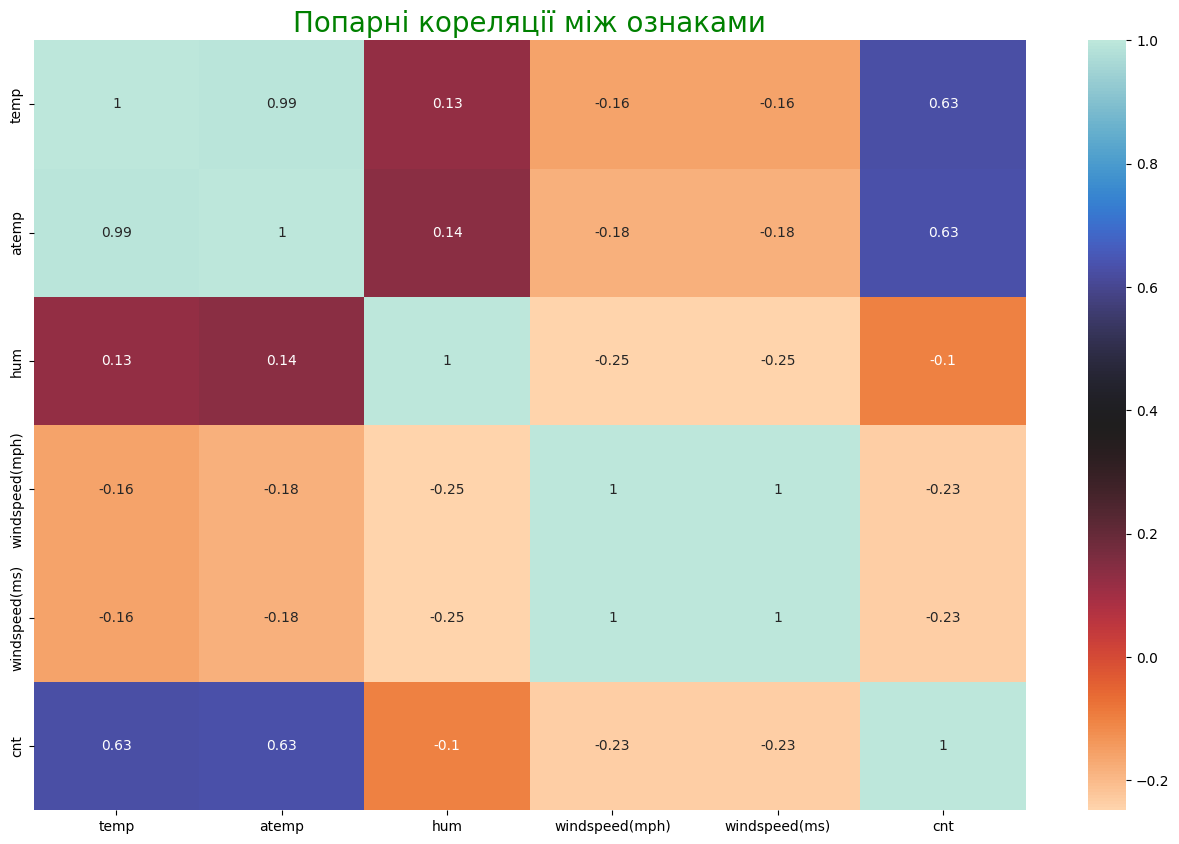

In [16]:
plt.rcParams["figure.figsize"] = (16, 10)
sns.heatmap(data.iloc[:, 7:].corr(), annot=True, cmap='icefire_r')
plt.title('Попарні кореляції між ознаками', fontsize=20, color='g')
plt.show()

На діагоналях, як і належить, стоять одиниці. Однак у матриці є ще дві пари сильно корелюючих стовпців: temp і atemp (корелюють за своєю природою) і два windspeed (бо це просто переведення одних одиниць в інші). Далі ми побачимо, що цей факт негативно впливає на навчання лінійної моделі.


Виведіть середні ознаки

In [17]:
#Додайте код
data.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

Ознаки мають різний масштаб, отже, для подальшої роботи нам краще нормувати матрицю об'єкти-ознаки.

### Проблема перша: колінеарні ознаки

Отже, в наших даних одна ознака дублює іншу, і є ще дві дуже схожі. Звичайно, ми могли б відразу видалити дублікати, але давайте подивимося, як відбувалося б навчання моделі, якби ми не помітили цю проблему.

Для початку проведемо масштабування, або стандартизацію ознак: з кожної ознаки віднімемо його середнє і поділимо стандартне відхилення. Це можна зробити за допомогою методу scale.

Крім того, потрібно перемішати вибірку, це буде потрібно для крос-валідації.

In [18]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [19]:
df_shuffled = shuffle(data, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

Давайте навчимо лінійну регресію на наших даних і подивимося на ваги ознак.

In [20]:
from sklearn.linear_model import LinearRegression



Створіть об'єкт лінійного регресора, навчіть його на всіх даних і виведіть ваги моделі (ваги зберігаються в змінній `coef_` класу регресора). Можна виводити пари (назва ознаки, вага), скориставшись функцією `zip`, вбудованою в мову python. Назви ознак зберігаються у змінній `df.columns`.

In [21]:
reg = LinearRegression().fit(X, y)
[i for i in list(zip(data.columns, reg.coef_))]

[('season', 570.8638501320808),
 ('yr', 1021.968374035042),
 ('mnth', -141.30042714888475),
 ('holiday', -86.7589678764022),
 ('weekday', 137.2260243674752),
 ('workingday', 56.39207450989123),
 ('weathersit', -330.22859154239825),
 ('temp', 367.45187644001305),
 ('atemp', 585.5777455406493),
 ('hum', -145.61314651687744),
 ('windspeed(mph)', 12456475364833.373),
 ('windspeed(ms)', -12456475365031.836)]

Ми бачимо, що ваги при лінійно-залежних ознаках по модулю значно більші, ніж за інших ознак. Щоб зрозуміти, чому так сталося, згадаємо аналітичну формулу, за якою обчислюються ваги лінійної моделі у методі найменших квадратів:

$$w = (X^TX)^{-1} X^T y$$

Якщо $X$ є колінеарні (лінійно-залежні) стовпці, матриця $X^TX$ стає виродженою, і формула перестає бути коректною. Чим більш залежні ознаки, тим меншим є визначник цієї матриці і тим гірша апроксимація $Xw \approx y$. Таку ситуацію називають _проблемою мультиколлінеарності_.

З парою (temp, atemp) трохи менш корелюючих змінних такого не сталося, проте на практиці завжди варто уважно стежити за коефіцієнтами за схожих ознак.

Для того, щоб вирішити проблему мультиколінеарності, потрібно скористатися регуляризатором. До функціонала, що оптимізується, додають $L_1$ або $L_2$ норму ваг, помножену на коефіцієнт регуляризації $\alpha$. У першому випадку метод називається Lasso, а в другому --- Ridge.


Давайте спробуємо навчити лінійні моделі з L_1 і L_2-регуляризацією, а далі порівняємо їх ваги. Навчіть регресори Ridge і Lasso з параметрами за промовчанням і переконайтеся, що проблема з вагами вирішилася.

Навчіть лінійну модель з $L_1$-регуляризацією (клас Lasso) і виведіть ваги

In [22]:
from sklearn.linear_model import Lasso, Ridge

In [23]:
lasso = Lasso().fit(X, y)
[i for i in list(zip(data.columns, lasso.coef_))]

[('season', 560.2416160308862),
 ('yr', 1019.4634940657196),
 ('mnth', -128.7306270367869),
 ('holiday', -86.15278133371095),
 ('weekday', 137.3478939049631),
 ('workingday', 55.21237064135677),
 ('weathersit', -332.3698569623486),
 ('temp', 376.36323620969597),
 ('atemp', 576.5307935045538),
 ('hum', -144.129155003486),
 ('windspeed(mph)', -197.13968940248404),
 ('windspeed(ms)', -2.8051512738133662e-08)]

Навчіть лінійну модель з $L_2$-регуляризацією (клас Ridge) і виведіть ваги

In [24]:
ridge = Ridge().fit(X, y)
[i for i in list(zip(data.columns, ridge.coef_))]

[('season', 563.0645722520193),
 ('yr', 1018.9483787875306),
 ('mnth', -131.8733202824786),
 ('holiday', -86.74609799709202),
 ('weekday', 138.00511117871915),
 ('workingday', 55.903110375064806),
 ('weathersit', -332.3497884990724),
 ('temp', 386.4578891919171),
 ('atemp', 566.3470470600581),
 ('hum', -145.07132729867268),
 ('windspeed(mph)', -99.25944108181756),
 ('windspeed(ms)', -99.25944115431525)]


На відміну від $L_2$-регуляризації, $L_1$ обнуляє ваги за деяких ознак Давайте поспостерігаємо, як змінюються ваги при збільшенні коефіцієнта регуляризації $\alpha$.

Для кожного значення коефіцієнта з `alphas` навчіть регресор `Lasso` і запишіть ваги список `coefs_lasso`, а потім навчіть `Ridge` і запишіть ваги в список `coefs_ridge'` Конвертуйте отримані списки в `np.array`.

In [25]:
alphas = np.arange(1, 500, 50)

coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

for index, a in enumerate(alphas):
    lasso = Lasso(alpha=a)
    lasso.fit(X, y)
    coefs_lasso[index] = lasso.coef_

for index, a in enumerate(alphas):
    ridge = Ridge(alpha=a)
    ridge.fit(X, y)
    coefs_ridge[index] = ridge.coef_
    

Проаналізуйте динаміку ваги при збільшенні параметра регуляризації:

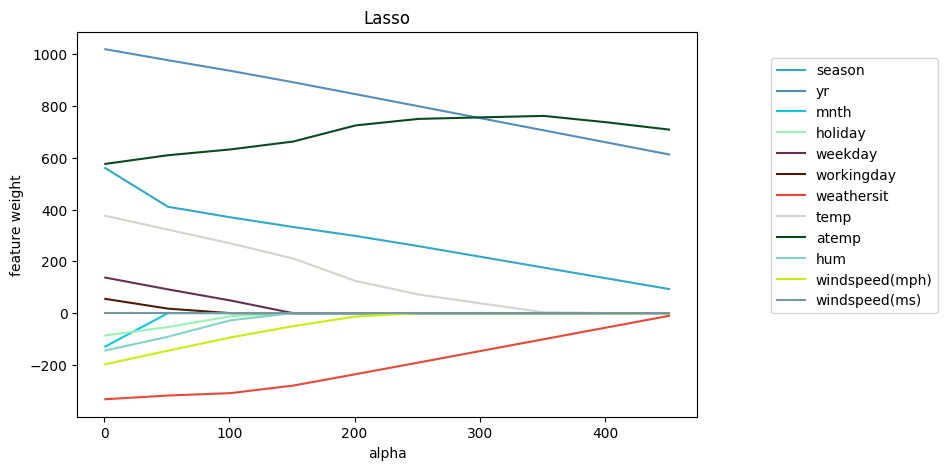

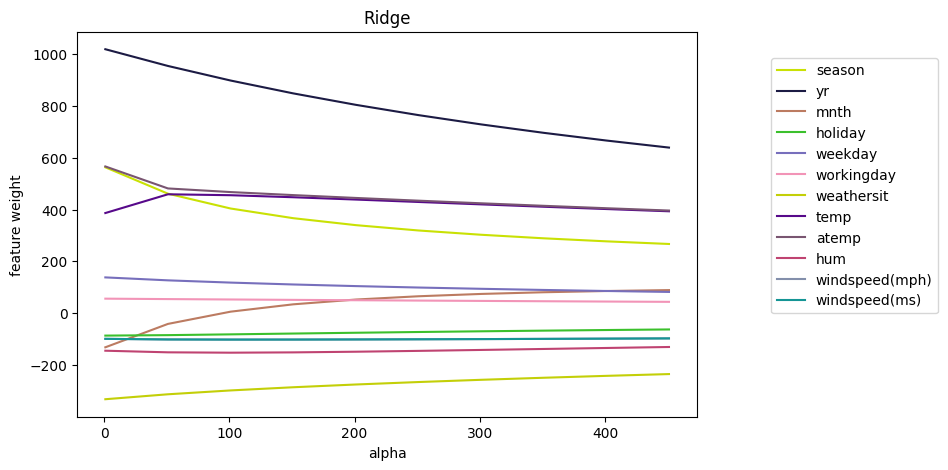

In [26]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, data.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, data.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Проаналізуйте графіки та дайте відповіді на такі запитання.

1. Який регуляризатор (Ridge або Lasso) агресивніше зменшує ваги при тому самому alpha?
2. Що станеться з вагами Lasso, якщо alpha зробити дуже великим? Поясніть чому так відбувається.
3. Чи можна стверджувати, що `Lasso` виключає одну з ознак `windspeed` за будь-якого значення `alpha > 0`? А Ridge? Вважається, що регуляризатор виключає ознаку, якщо коефіцієнт за нього менше $10^{-3}$.
4. Який із регуляризаторів підійде для відбору неінформативних ознак?

Відповіді:
1. Регуляризатор Lasso агресивніше зменшує ваги при тому самому alpha.
2. Lasso-регресія накладує штраф на l1-норму бета-вектору. l1-норма вектору — це сума абсолютних значень в цьому векторі. Це заставляє регресію обнуляти деякі коефіцієнти в бета-векторі. Чим виша лямбда, тим більше штрафуємо модель, тобто обмежуємо суму абсолютних значень бета-вектору. Якщо alpha зробити дуже великим, всі ваги обнуляться, тому що L1-регуляризація поступово обнуляє ваги ознак і при великому alpha сума модулів ваг повинна буде прагнути нуля.
3. Так, можна стверджувати, що `Lasso` виключає одну з ознак `windspeed` за будь-якого значення `alpha > 0`, оскільки ми маємо горизонтальну лінію на графіку, а Ridge ні.
4. Для відбору неінформативних ознак підійде Lasso, оскільки він здійснює відбір ознак і одними з перших (після сильнокорелюючих) будуть обнулені ваги у неінформативних ознак.



Далі працюватимемо з `Lasso`.

Отже, бачимо, що з зміні alpha модель по-різному підбирає коефіцієнти ознак. Нам потрібно вибрати найкраще alpha.

Для цього, по-перше, нам потрібна метрика якості. Будемо використовувати як метрику функціонал методу найменших квадратів, що сам оптимізується, тобто `Mean Square Error`.

По-друге, треба зрозуміти, на яких даних цю метрику рахувати. Не можна вибирати `alpha` за значенням MSE на навчальній вибірці, тому що тоді ми не …анія на нових для неї даних. Якщо ми виберемо одне розбиття вибірки на навчальну та тестову (це називається holdout), то налаштуємося на конкретні "нові" дані, і знову можемо перенавчитися. Тому будемо робити кілька розбиття вибірки, на кожному пробувати різні значення alpha, а потім усереднити MSE. Найзручніше робити такі розбиття крос-валідацією, тобто розділити вибірку на $K$ часто, і щоразу брати одну з них як тестову, а з блоків, що залишилися, складати навчальну вибірку.

Робити крос-валідацію для регресії в sklearn дуже просто: для цього є спеціальний регресор, __LassoCV__, який бере на вхід список з alpha і кожного з них обчислює MSE на крос-валідації. Після навчання (якщо залишити параметр cv=3 за замовчуванням) регресор міститиме змінну __mse\_path\___, матрицю розміру len(alpha) x k, k = 3 (кількість блоків у крос-валідації), що містить значення MSE на тесті для відповідних запусків . Крім того, в змінній alpha\_ буде зберігатися вибране значення параметра регуляризації, а coef\_, традиційно, навчені ваги, відповідні цьому alpha_.

Регресор може змінювати порядок, в якому він проходить через alphas; Для порівняння з матрицею MSE краще використовувати змінну регресора alphas_.

Навчити регресор `LassoCV` треба на всіх параметрах регуляризації з alpha. Побудуйте графік _усередненого_ за рядками `MSE` залежно від `alpha` (використовуйте для цього функцію `create_plot`).

Виведіть вибране `alpha`, а також пари "ознака-коефіцієнт" для навченого вектора коефіцієнтів.

In [27]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = map(lambda e: e[0], data)
    y = map(lambda e: e[1], data)
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

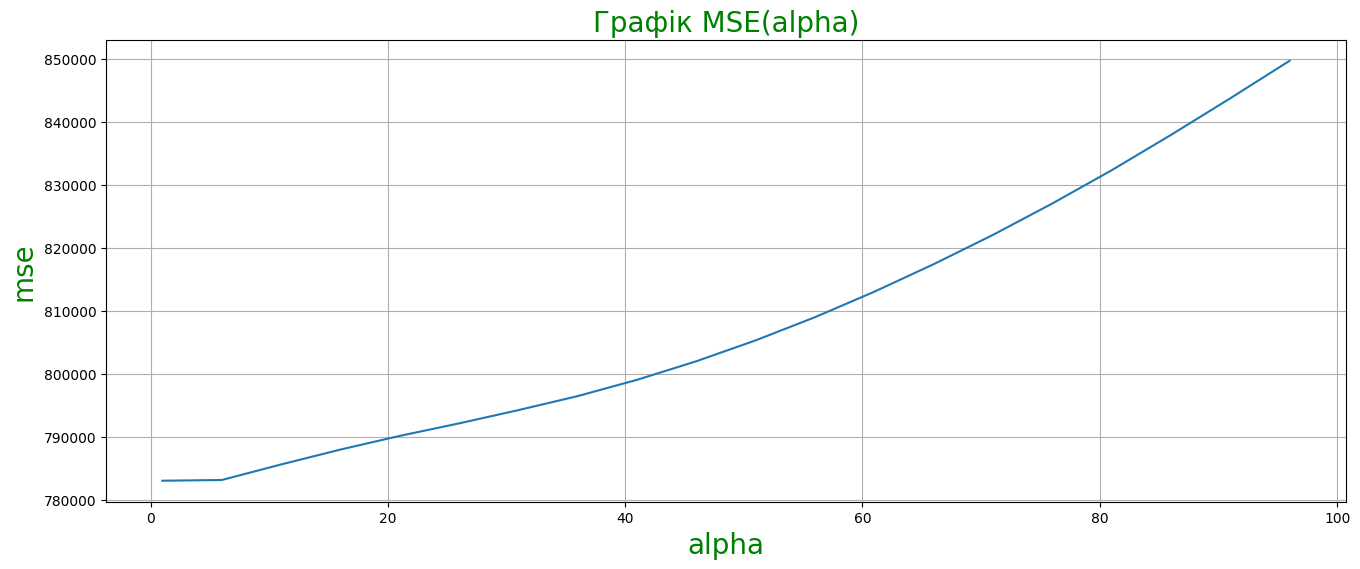

Alpha = 1


[('season', 560.2416160308862),
 ('yr', 1019.4634940657196),
 ('mnth', -128.7306270367869),
 ('holiday', -86.15278133371095),
 ('weekday', 137.3478939049631),
 ('workingday', 55.21237064135677),
 ('weathersit', -332.3698569623486),
 ('temp', 376.36323620969597),
 ('atemp', 576.5307935045538),
 ('hum', -144.129155003486),
 ('windspeed(mph)', -197.13968940248404),
 ('windspeed(ms)', -2.8051512738133662e-08)]

In [28]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)

regressor =  LassoCV(alphas=alphas).fit(X, y)

mse = [i.mean() for i in regressor.mse_path_]

plt.rcParams["figure.figsize"] = (16, 6)
plt.plot(regressor.alphas_, mse)
plt.title('Графік MSE(alpha)', fontsize=20, color='g')
plt.xlabel("alpha", fontsize=20, color='g')
plt.ylabel("mse", fontsize=20, color='g')
plt.grid()
plt.show()

print(f'Alpha = {regressor.alpha_}')
[i for i in list(zip(data.columns, regressor.coef_))]

Отже, ми вибрали певний параметр регулювання. Давайте подивимося, які б ми вибирали alpha, якби ділили вибірку лише один раз на навчальну та тестову, тобто розглянемо траєкторії MSE, що відповідають окремим блокам вибірки.


Виведіть значення `alpha`, що відповідають мінімумам `MSE` на кожному розбиття (тобто по стовпцях).
На трьох окремих графіках візуалізуйте стовпці `mse_path_`.

Alpha = 1, MSE = 691447.250787807
Alpha = 11, MSE = 883471.1829425399
Alpha = 1, MSE = 710110.1624117335
Alpha = 26, MSE = 860737.405948872
Alpha = 21, MSE = 750676.3567789994


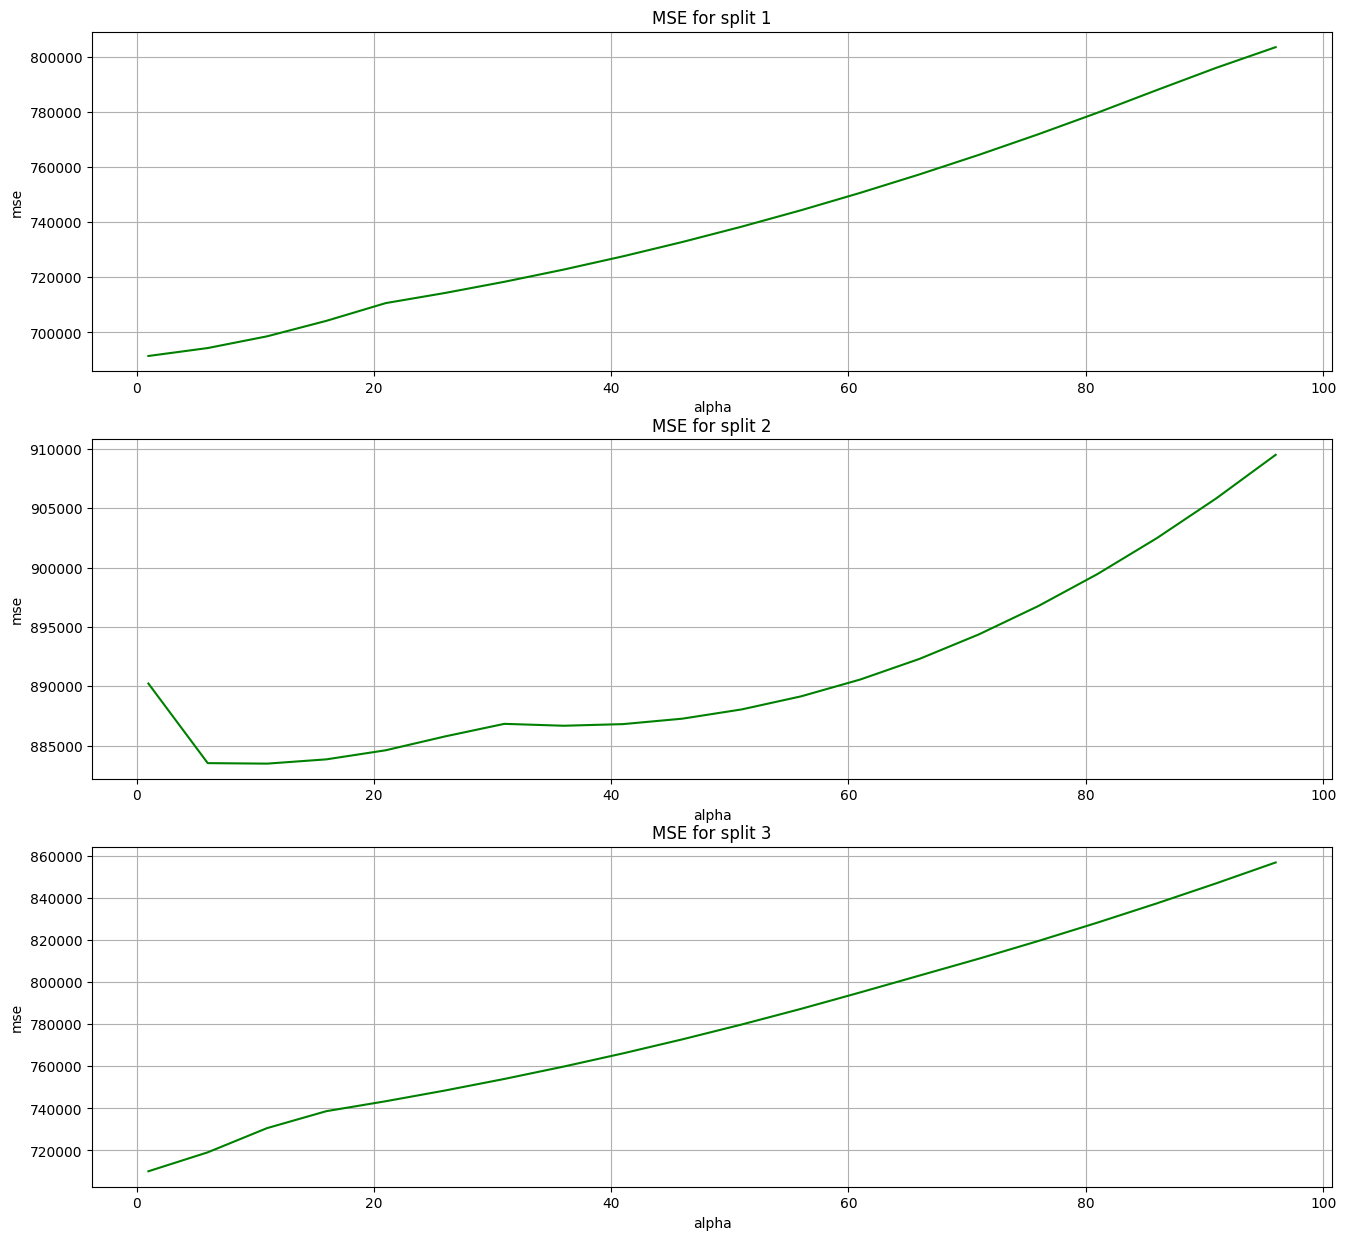

In [29]:
for i in range(3):
    plt.rcParams["figure.figsize"] = (16, 15)
    plt.subplot(3, 1, i+1)
    plt.plot(regressor.alphas_, regressor.mse_path_[:, i], c='g')
    plt.title(f'MSE for split {i+1}')
    plt.xlabel('alpha')
    plt.ylabel('mse')
    plt.grid()

for alpha, mse in enumerate(np.min(regressor.mse_path_, axis=0)):
    alpha_min = regressor.mse_path_[:, alpha].argmin(axis=0)
    print(f'Alpha = {regressor.alphas_[alpha_min]}, MSE = {mse}')

На кожному розбиття оптимальне значення `alpha` своє, і йому відповідає велике MSE на інших розбиття. Виходить, що ми налаштовуємось на конкретні навчальні та контрольні вибірки. При виборі `alpha` на крос-валідації ми вибираємо щось "середнє", що даватиме прийнятне значення метрики на різних розбиття вибірки.


Нарешті, як прийнято в аналізі даних, проінтерпретуємо результат. 

In [30]:
[i for i in list(zip(data.columns, regressor.coef_))]

[('season', 560.2416160308862),
 ('yr', 1019.4634940657196),
 ('mnth', -128.7306270367869),
 ('holiday', -86.15278133371095),
 ('weekday', 137.3478939049631),
 ('workingday', 55.21237064135677),
 ('weathersit', -332.3698569623486),
 ('temp', 376.36323620969597),
 ('atemp', 576.5307935045538),
 ('hum', -144.129155003486),
 ('windspeed(mph)', -197.13968940248404),
 ('windspeed(ms)', -2.8051512738133662e-08)]

Ознаки з найбільшими позитивними коефіцієнтами – yr, atemp, season, temp. За графіками видно зростаючу лінійну залежність cnt від ознак atemp, temp і певною мірою yr (але всього 2 роки, тому це не можна вважати показовим). Для ознаки season видно, що влітку велосипедів беруть більше, ніж в інші пори року. Виходячи з здорового глузду, логічно стверджувати, що при підвищенні температури, а отже і влітку, велосипеди беруть більше.

Ознаки з найбільшими за модулем негативними коефіцієнтами - weathersit, windspeed(mph), hum. За графіками видно, що для weathersit спадна залежність - менше людей беруть велосипеди в погану погоду. Для windspeed(mph) і hum тенденція загалом теж спадна, але нелінійна. За вологості, близької до максимальної, і дуже сильного вітру велосипеди беруть менше.

In [31]:
regressor.coef_

array([ 5.60241616e+02,  1.01946349e+03, -1.28730627e+02, -8.61527813e+01,
        1.37347894e+02,  5.52123706e+01, -3.32369857e+02,  3.76363236e+02,
        5.76530794e+02, -1.44129155e+02, -1.97139689e+02, -2.80515127e-08])

Ознаки з коефіцієнтами, близькими до нуля – windspeed(ms). Ця ознака виключена з моделі, оскільки є лінійно залежною від ознаки windspeed(mph). Він впливає на попит на велосипеди, але так само, як і windspeed(mph), а в двох сильнокорелюючих (по суті однакових) ознаках немає сенсу, це веде до мультиколлінеарності.